In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# generate random samples from Gaussian distributions #
N = 100

true_mean_0 = 1
true_mean_1 = 3
true_mean_2 = 5

true_precision_0 = 10
true_precision_1 = 10
true_precision_2 = 10

def sample(component):
    if component == 0:
        return np.random.normal(true_mean_0, np.sqrt(1 / true_precision_0), 1)[0]
    if component == 1:
        return np.random.normal(true_mean_1, np.sqrt(1 / true_precision_1), 1)[0]
    else:
        return np.random.normal(true_mean_2, np.sqrt(1 / true_precision_2), 1)[0]

# weight distribution p can be changed to create more Gaussian component data
mask = np.random.choice([0, 1, 2], N, p=[0, 0, 1])
data = [sample(i) for i in mask]

df = pd.DataFrame(data)
df.to_csv('data.csv', sep=',', header=False, index=False)

<IPython.core.display.Javascript object>


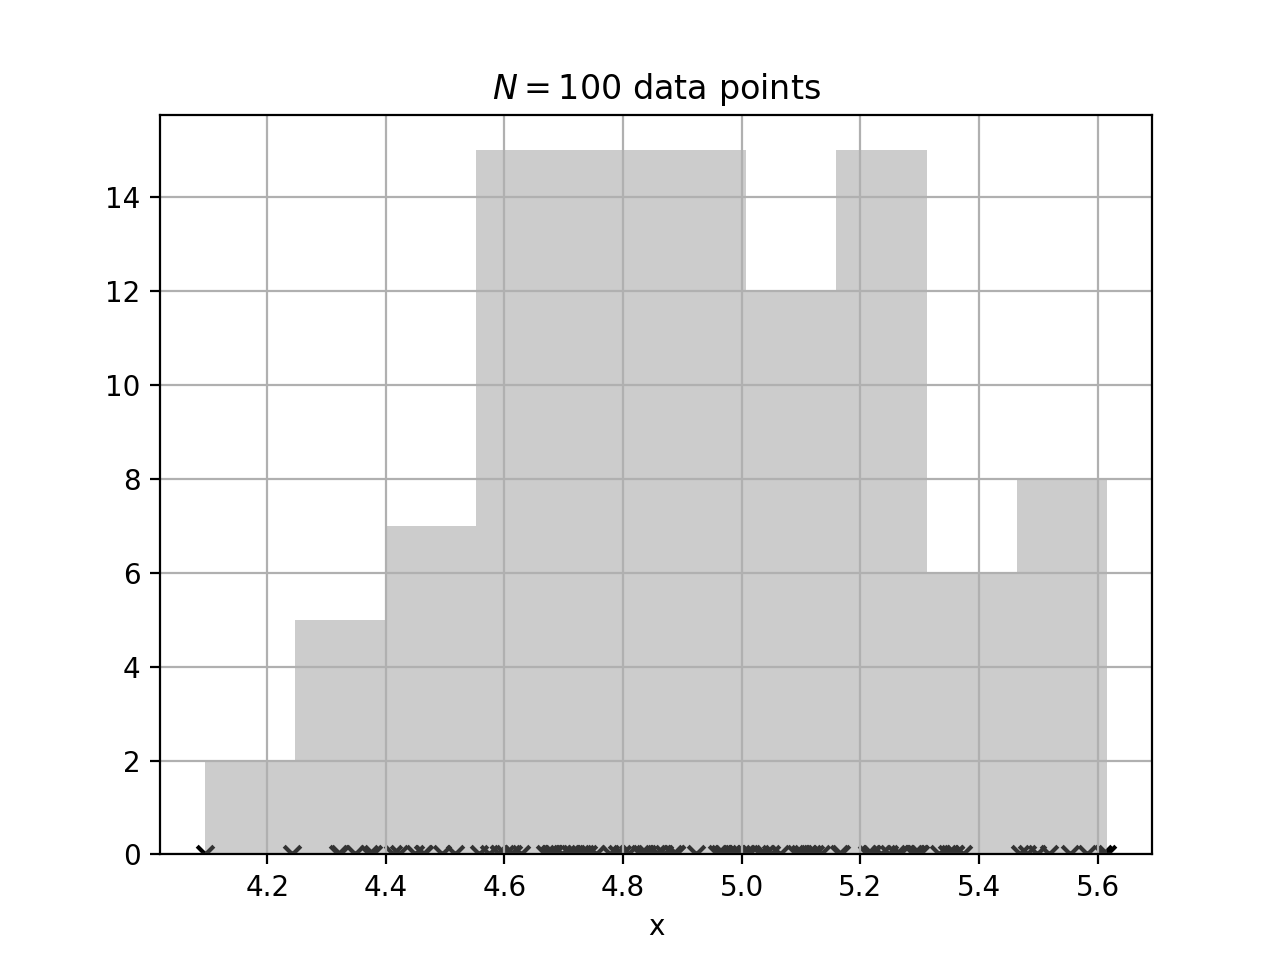

In [12]:
plt.scatter(data, np.zeros(len(data)), color='black', marker='x')
plt.hist(data, 10, alpha=0.4, color='gray')
plt.grid()
plt.xlabel('x')
plt.title(r'$N=100$ data points')
# plt.savefig('data.png')
plt.show()

<IPython.core.display.Javascript object>


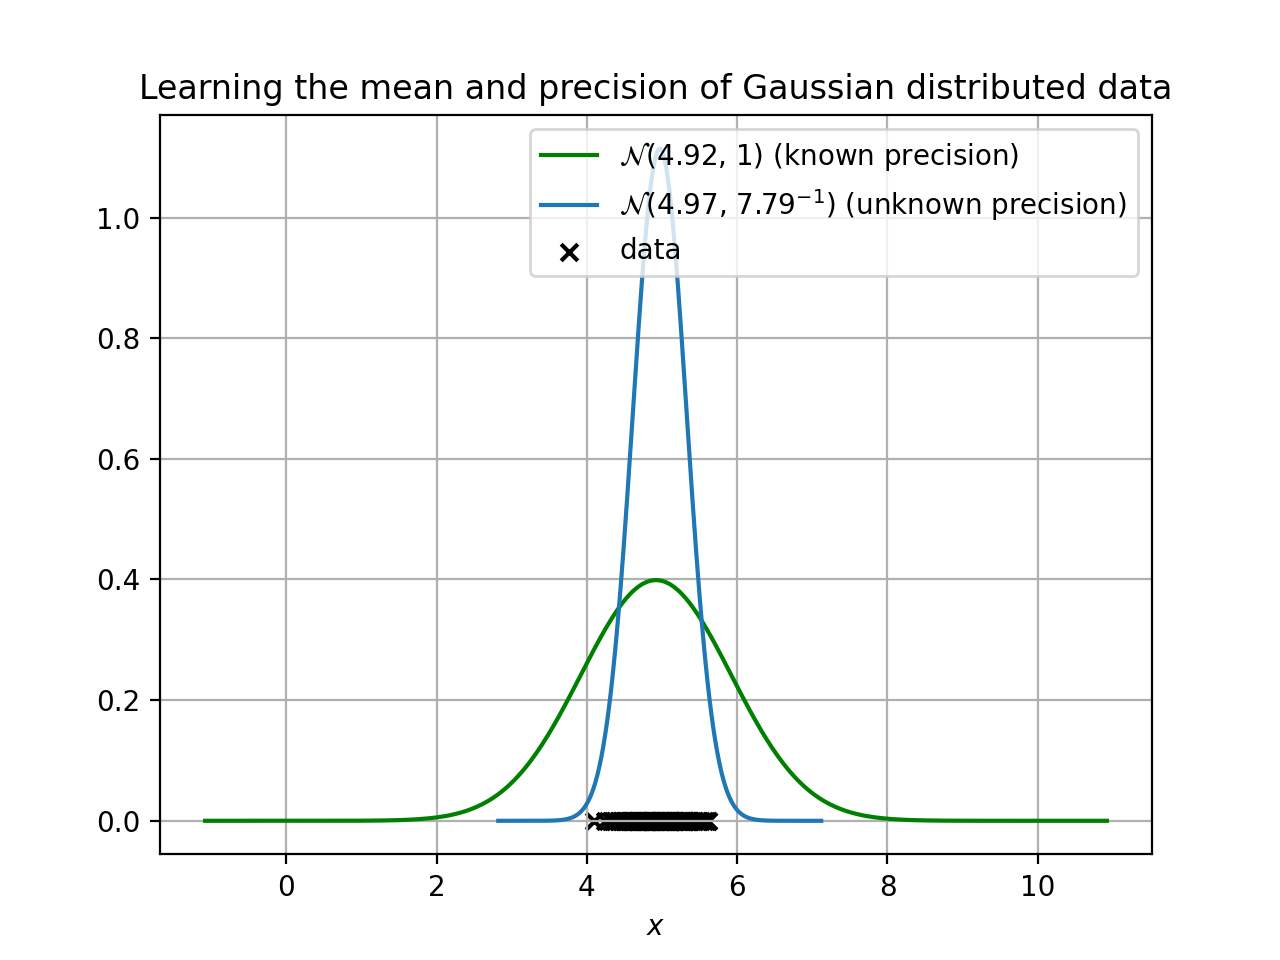

In [11]:
# plot the Gaussian with learned parameters #
m = 4.92
p = 1
sigma = np.sqrt(1 / p)
xx = np.linspace(m - 6 * sigma, m + 6 * sigma, 500)
plt.plot(xx, stats.norm.pdf(xx, m, sigma), label=r'$\mathcal{N}$(4.92, 1) (known precision)', color='green')

m = 4.97
p = 7.797
sigma = np.sqrt(1 / p)
xx = np.linspace(m - 6 * sigma, m + 6 * sigma, 500)
plt.plot(xx, stats.norm.pdf(xx, m, sigma), label=r'$\mathcal{N}$(4.97, $7.79^{-1}$) (unknown precision)')

plt.scatter(data, np.zeros(len(data)), color='black', label='data', marker='x')

plt.legend(loc='upper right')
plt.grid()
plt.title("Learning the mean and precision of Gaussian distributed data")
plt.xlabel(r"$x$")
# plt.savefig('learned-parameters.png')
plt.show()

<IPython.core.display.Javascript object>


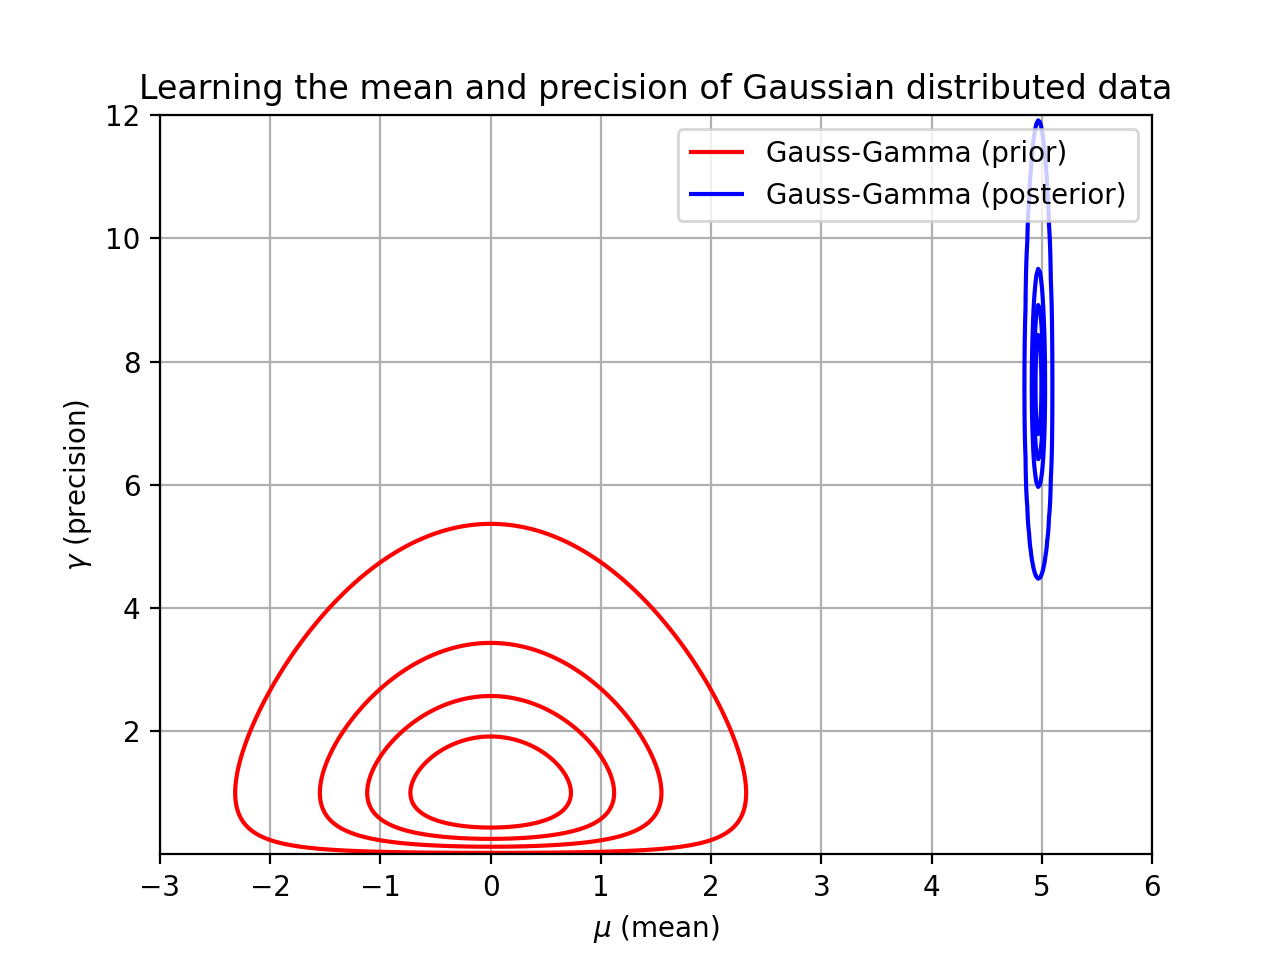

In [89]:
def q_mu(x, mu, sigma):
    return stats.norm.pdf(x, mu, sigma)

def q_tau(tau, a, b):
    return stats.gamma.pdf(tau, a, loc=0, scale=1 / b)

def plot_est_dist(ax, mu, beta, a, b, colors='black', alpha=1):
    mus = np.linspace(-3, 6, 550)
    taus = np.linspace(0.001, 12, 550)

    M, T = np.meshgrid(mus, taus, indexing="ij")

    Z = np.zeros_like(M)

    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            Z[i][j] = q_mu(mus[i], mu, np.sqrt(1 / beta)) * q_tau(taus[j], a, b)
    return ax.contour(M, T, Z, levels=np.linspace(0.01, np.max(Z), 5), colors=colors)

fig, ax = plt.subplots(1, 1)
cntr1 = plot_est_dist(ax, 0, 1, 2, 1, colors='red')
cntr2 = plot_est_dist(ax, 4.97, 1 / 0.001281, 52, 1 / 0.149, colors='blue')
h1,_ = cntr1.legend_elements()
h2,_ = cntr2.legend_elements()
ax.legend([h1[0], h2[0]], ['Gauss-Gamma (prior)',
                           'Gauss-Gamma (posterior)'])
ax.grid()
ax.set_title('Learning the mean and precision of Gaussian distributed data')
ax.set_ylabel(r'$\gamma$ (precision)')
ax.set_xlabel(r'$\mu$ (mean)')
plt.savefig('gauss-gamma.png')
plt.show()